# Data Exploration

In this notebook, we explore the cleaned and joined `df_final.csv` output from [01_data_clean_join.ipynb](./01_data_clean_join.ipynb) to look for and resolve **outliers** and explore variable **distributions** and **relationships** to guide us our predictive model development.

### Resolve Outliers
Summary of outliers suggestive of data errors:
1. `generation*` sudden zeros ➡️ interpolated
2. `pressure_Barcelona` outliers outside of sea level range ➡️ interpolated
3. `wind_speed_Valencia` outlier outside of normal level ➡️ interpolated

Then `df_clean.csv` is written out for input into modeling notebooks.

### Explore and Visualize
Summary of interesting findings:
1. ...
2.

In [1]:
# Import libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Output options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Read the joined energy + weather dataset
df = pd.read_csv('./Data/df_final.csv', index_col='time')
df.shape #(35064, 122)

(35064, 122)

In [4]:
# Quick data cleaning sanity check
df.isnull().sum().sum() # 0 -> no missing data
df.index.duplicated().any() # False -> no duplicated indices

False

## Resolve Outliers - Energy

In [5]:
# Quick check of numerical outliers from energy dataset
df[df.columns[0:20]].describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.532797,448.091918,5622.705653,4256.550622,298.341319,475.563997,972.206337,2605.496121,6263.501854,60.225416,85.634326,1432.804957,269.419205,5465.115589,1439.066735,5471.216689,28712.129962,28697.608573,49.874341,57.884023
std,85.346455,354.616732,2201.557635,1961.973297,52.518371,792.291849,400.714694,1835.074561,840.244555,20.238846,14.076953,1680.007595,50.217172,3213.736451,1677.703355,3176.312853,4594.100854,4575.872425,14.618900,14.204083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1078.000000,5759.000000,53.000000,73.000000,71.000000,240.000000,2933.000000,69.000000,2979.000000,24793.750000,24806.750000,41.490000,49.347500
50%,367.000000,509.000000,4969.500000,4475.000000,300.000000,68.000000,906.000000,2165.000000,6564.000000,57.000000,88.000000,616.000000,279.000000,4849.000000,576.000000,4855.000000,28906.000000,28902.000000,50.520000,58.020000
75%,433.000000,757.000000,6429.000000,5839.000000,330.000000,616.000000,1250.000000,3757.250000,7025.000000,80.000000,97.000000,2579.000000,310.000000,7399.500000,2636.000000,7353.000000,32263.250000,32194.250000,60.530000,68.010000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,5836.000000,17430.000000,41390.000000,41015.000000,101.990000,116.800000


Eyeballing the min, mean/50%, and max rows, these issues stand out:
- `generation fossil gas` and `generation hydro pumped storage consumption` have high outliers
- All `generation*` variables have zero generation times and potential low outliers

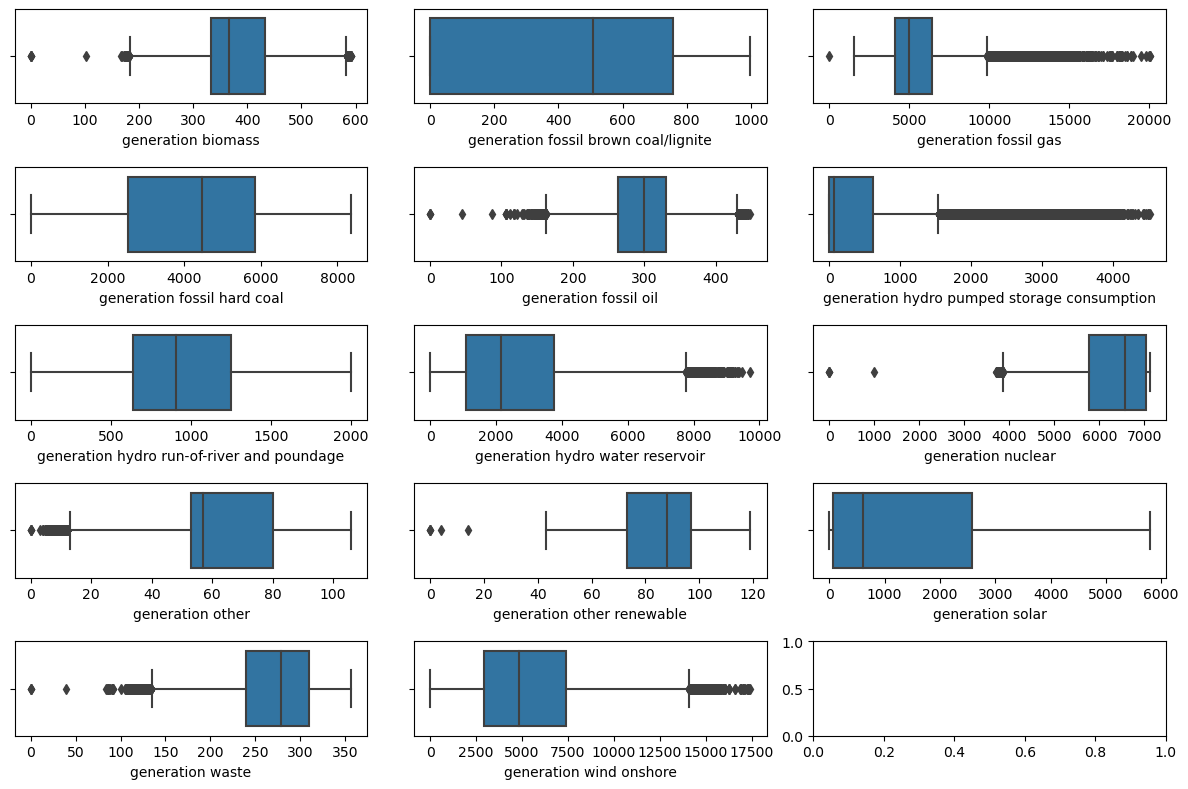

In [6]:
# Visualize 'generation fossil gas' and 'generation hydro pumped storage consumption' for outliers
fig, axes = plt.subplots(5, 3, figsize=(12, 8))
axes = axes.flatten() #flattern for easy iteration
for i, col in enumerate(df.columns[:14]): #loop through variables
    sns.boxplot(x=df[col], ax=axes[i])
plt.tight_layout()
plt.show()

Analysis
- `generation fossil gas` and `generation hydro pumped storage consumption` high outliers seem consistent with its distribution
- `generation*` low outliers do exist including at zero (down times for the generation system?)

In [7]:
# Check when multiple generation systems were zero
df[(df['generation nuclear'] == 0) & (df['generation biomass'] == 0)]

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,temp_Barcelona,pressure_Barcelona,humidity_Barcelona,wind_speed_Barcelona,wind_deg_Barcelona,rain_1h_Barcelona,clouds_all_Barcelona,weather_broken clouds_Barcelona,weather_few clouds_Barcelona,weather_light rain_Barcelona,weather_others_Barcelona,weather_scattered clouds_Barcelona,weather_sky is clear_Barcelona,temp_Bilbao,pressure_Bilbao,humidity_Bilbao,wind_speed_Bilbao,wind_deg_Bilbao,rain_1h_Bilbao,clouds_all_Bilbao,weather_broken clouds_Bilbao,weather_few clouds_Bilbao,weather_light rain_Bilbao,weather_others_Bilbao,weather_scattered clouds_Bilbao,weather_sky is clear_Bilbao,temp_Madrid,pressure_Madrid,humidity_Madrid,wind_speed_Madrid,wind_deg_Madrid,rain_1h_Madrid,clouds_all_Madrid,weather_broken clouds_Madrid,weather_few clouds_Madrid,weather_light rain_Madrid,weather_others_Madrid,weather_scattered clouds_Madrid,weather_sky is clear_Madrid,temp_Seville,pressure_Seville,humidity_Seville,wind_speed_Seville,wind_deg_Seville,rain_1h_Seville,clouds_all_Seville,weather_broken clouds_Seville,weather_few clouds_Seville,weather_light rain_Seville,weather_others_Seville,weather_scattered clouds_Seville,weather_sky is clear_Seville,temp_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,clouds_all_Valencia,weather_broken clouds_Valencia,weather_few clouds_Valencia,weather_light rain_Valencia,weather_others_Valencia,weather_scattered clouds_Valencia,weather_sky is clear_Valencia,hour_0.0,hour_1.0,hour_2.0,hour_3.0,hour_4.0,hour_5.0,hour_6.0,hour_7.0,hour_8.0,hour_9.0,hour_10.0,hour_11.0,hour_12.0,hour_13.0,hour_14.0,hour_15.0,hour_16.0,hour_17.0,hour_18.0,hour_19.0,hour_20.0,hour_21.0,hour_22.0,hour_23.0,month_1.0,month_2.0,month_3.0,month_4.0,month_5.0,month_6.0,month_7.0,month_8.0,month_9.0,month_10.0,month_11.0,month_12.0,weekday_dummy
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-11-12 20:00:00+00:00,0.0,0.0,6899.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,8536.0,36671.0,36562.0,69.48,67.66,285.15,1011.0,81.0,1.0,290.0,0.0,0.0,0,0,0,0,0,1,286.04,1022.0,93.0,7.0,310.0,0.0,75.0,1,0,0,0,0,0,286.49,1020.0,47.0,4.0,340.0,0.0,0.0,0,0,0,0,0,1,288.94,1020.0,67.0,2.0,210.0,0.0,0.0,0,0,0,0,0,1,293.15,1015.0,28.0,4.0,340.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2017-11-14 11:00:00+00:00,0.0,0.0,10064.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4325.0,7561.0,33805.0,34172.0,60.53,66.17,285.65,1018.0,35.0,6.0,33.0,0.0,0.0,0,0,0,0,0,1,281.93,1028.0,66.0,1.0,150.0,0.0,20.0,0,1,0,0,0,0,282.52,1020.0,37.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,285.94,1020.0,33.0,6.0,50.0,0.0,0.0,0,0,0,0,0,1,289.15,1019.0,19.0,1.0,277.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2017-11-14 18:00:00+00:00,0.0,0.0,12336.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,5679.0,35592.0,34998.0,68.05,75.45,284.15,1019.0,53.0,3.0,46.0,0.0,0.0,0,0,0,0,0,1,279.49,1026.0,70.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,285.20,1018.0,37.0,1.0,280.0,0.0,0.0,0,0,0,0,0,1,289.15,1017.0,53.0,2.0,100.0,0.0,0.0,0,0,0,0,0,1,286.15,1019.0,35.0,1.0,150.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


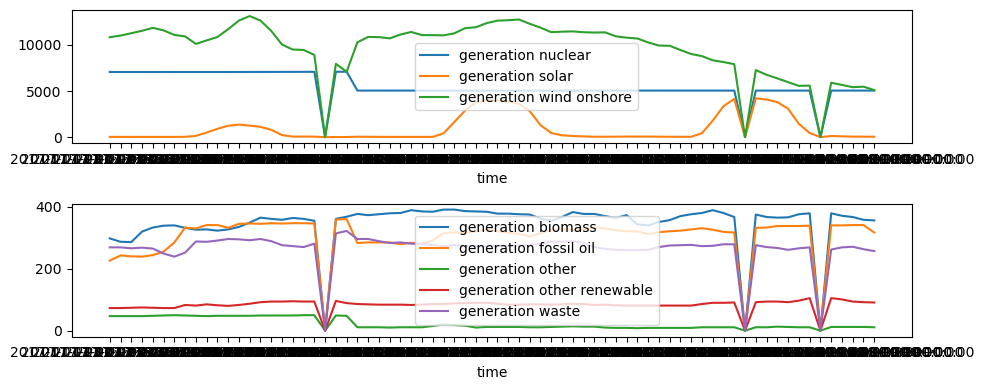

In [8]:
# TO-DO: fix xticklabels to be days only

# Filter data within the specified time range
df_time = df.loc['2017-11-12':'2017-11-15']

# Plot variable over the specified time range
gen_vars = [['generation nuclear', 'generation solar', 'generation wind onshore'],
            ['generation biomass', 'generation fossil oil', 'generation other', 'generation other renewable', 'generation waste']]
fig, axes = plt.subplots(2, 1, figsize=(10, 4))
for i, ax in enumerate(axes):
    for gen_var in gen_vars[i]:
        sns.lineplot(data=df_time, x=df_time.index, y=gen_var, label=gen_var, ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(0.4, 0.5))
    ax.set_ylabel('')
    
plt.tight_layout()
plt.show()

In [9]:
# Check how often each 'generation*' is zero
cols = [col for col in df.columns if 'generation' in col]
df[cols].eq(0).sum().sort_values(ascending=False)

generation hydro pumped storage consumption    12615
generation fossil brown coal/lignite           10524
generation biomass                                 4
generation other                                   4
generation fossil hard coal                        3
generation fossil oil                              3
generation hydro run-of-river and poundage         3
generation hydro water reservoir                   3
generation nuclear                                 3
generation other renewable                         3
generation solar                                   3
generation waste                                   3
generation wind onshore                            3
generation fossil gas                              1
dtype: int64

Seeing that most of these generation systems suddenly spiked down to 0 and then back up to previous levels strongly suggests that these are data ERRORS. **Set to NA for now.**

In [10]:
# Replace outliers in 'generation*' with NaNs
gen0_counts = df[cols].eq(0).sum()
gen0 = gen0_counts[gen0_counts < 10].index
    
for gen in gen0:
    df.loc[df[gen] == 0, gen] = np.nan

## Resolve Outliers - Weather

In [11]:
# Quick check of numerical outliers from weather datasets
df[df.columns[20:85]].describe()

,temp_Barcelona,pressure_Barcelona,humidity_Barcelona,wind_speed_Barcelona,wind_deg_Barcelona,rain_1h_Barcelona,clouds_all_Barcelona,weather_broken clouds_Barcelona,weather_few clouds_Barcelona,weather_light rain_Barcelona,weather_others_Barcelona,weather_scattered clouds_Barcelona,weather_sky is clear_Barcelona,temp_Bilbao,pressure_Bilbao,humidity_Bilbao,wind_speed_Bilbao,wind_deg_Bilbao,rain_1h_Bilbao,clouds_all_Bilbao,weather_broken clouds_Bilbao,weather_few clouds_Bilbao,weather_light rain_Bilbao,weather_others_Bilbao,weather_scattered clouds_Bilbao,weather_sky is clear_Bilbao,temp_Madrid,pressure_Madrid,humidity_Madrid,wind_speed_Madrid,wind_deg_Madrid,rain_1h_Madrid,clouds_all_Madrid,weather_broken clouds_Madrid,weather_few clouds_Madrid,weather_light rain_Madrid,weather_others_Madrid,weather_scattered clouds_Madrid,weather_sky is clear_Madrid,temp_Seville,pressure_Seville,humidity_Seville,wind_speed_Seville,wind_deg_Seville,rain_1h_Seville,clouds_all_Seville,weather_broken clouds_Seville,weather_few clouds_Seville,weather_light rain_Seville,weather_others_Seville,weather_scattered clouds_Seville,weather_sky is clear_Seville,temp_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,clouds_all_Valencia,weather_broken clouds_Valencia,weather_few clouds_Valencia,weather_light rain_Valencia,weather_others_Valencia,weather_scattered clouds_Valencia,weather_sky is clear_Valencia
count,35064.000000,3.506400e+04,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,289.867178,1.287211e+03,73.830710,2.782740,187.664243,0.108487,22.714693,0.075833,0.270962,0.053531,0.081166,0.097621,0.420888,286.443451,1017.483858,78.731006,1.958305,159.908938,0.119156,43.438712,0.211727,0.127709,0.141484,0.159166,0.118897,0.241016,288.277131,1011.781115,58.725331,2.433807,173.363906,0.043301,20.661334,0.082364,0.120009,0.038672,0.091433,0.087098,0.580424,293.166541,1018.536990,63.780516,2.482717,151.885809,0.041136,14.165070,0.047941,0.087183,0.033767,0.101985,0.056725,0.672399,290.783954,1015.979381,65.093971,2.692477,160.801648,0.034458,20.740475,0.079711,0.309577,0.033624,0.039784,0.094342,0.442961
std,6.723623,1.346303e+04,17.720809,1.996081,108.564505,0.667771,27.328443,0.264734,0.444463,0.225092,0.273094,0.296806,0.493709,6.803527,9.820662,16.707510,1.870223,122.860599,0.369940,33.739203,0.408538,0.333771,0.348525,0.365836,0.323672,0.427706,9.326993,20.239961,24.883323,1.973041,121.945440,0.198318,29.656482,0.274922,0.324977,0.192815,0.288228,0.281982,0.493497,8.082475,6.867486,22.881475,1.868503,104.328755,0.215358,26.169696,0.213644,0.282108,0.180631,0.302633,0.231319,0.469345,7.234569,11.937650,19.678281,2.582959,120.412607,0.263594,25.604016,0.270850,0.462326,0.180262,0.195455,0.292308,0.496743
min,262.240000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,266.850000,961.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,264.132000,927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,271.050000,986.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

Eyeballing the min, mean/50%, and max rows (and excluding `weather*` qual/OHE) these issues stand out:
- `pressure_Barcelona`, `wind_speed_Valencia` have very high outliers
- `rain_1h_Barcelona`, `rain_1h_Valencia` have high outliers
- `rain_1h*` and `clouds_all*` are zero-heavy ➡️ EDA/Viz

<AxesSubplot:xlabel='wind_speed_Valencia'>

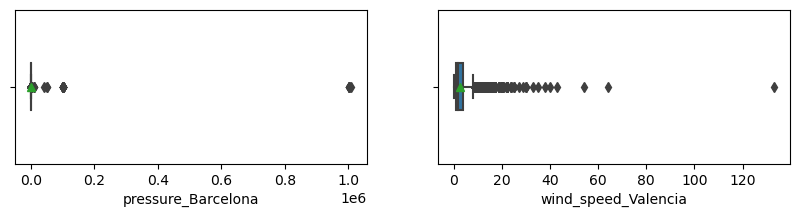

In [29]:
# Check boxplot for very high outliers
fig, axes = plt.subplots(1, 2, figsize=(10, 2))
sns.boxplot(x=df['pressure_Barcelona'], width=0.3, showmeans=True, ax=axes[0])
sns.boxplot(x=df['wind_speed_Valencia'], width=0.3, showmeans=True, ax=axes[1])

These seem to be data ERRORS based on the very far distance of these readings away even from other less extreme outliers for these physical phenomena. **Thus setting to NA for now.**
- Normal sea level pressure is around 1000 hPA
- The highest recorded wind speed is 113 m/s

<AxesSubplot:xlabel='wind_speed_Valencia'>

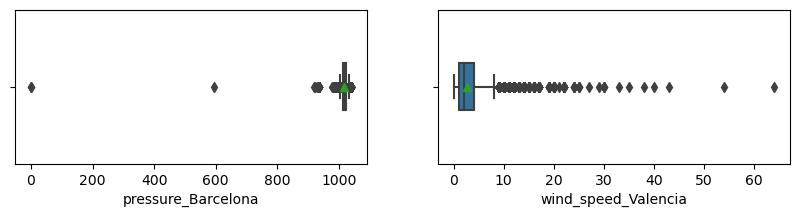

In [33]:
# Replace very high outliers in weather dataset with NaNs
df.loc[df['pressure_Barcelona'] > 2000, 'pressure_Barcelona'] = np.nan
df.loc[df['wind_speed_Valencia'] > 120, 'wind_speed_Valencia'] = np.nan

# Recheck boxplots
fig, axes = plt.subplots(1, 2, figsize=(10, 2))
sns.boxplot(x=df['pressure_Barcelona'], width=0.3, showmeans=True, ax=axes[0])
sns.boxplot(x=df['wind_speed_Valencia'], width=0.3, showmeans=True, ax=axes[1])

We should also remove the low outliers for pressure since ~600 hPa is associated with Earth's atmosphere. **Set to NA for now.**

<AxesSubplot:xlabel='wind_speed_Valencia'>

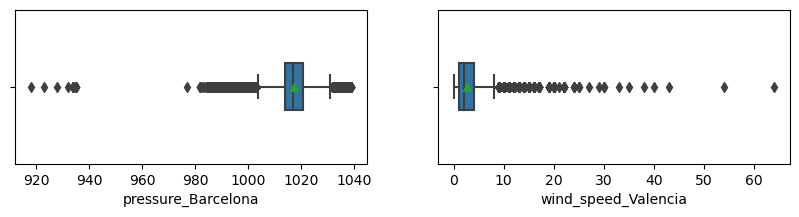

In [36]:
# Replace very low outliers in weather dataset with NaNs
df.loc[df['pressure_Barcelona'] < 800, 'pressure_Barcelona'] = np.nan

# Recheck boxplots
fig, axes = plt.subplots(1, 2, figsize=(10, 2))
sns.boxplot(x=df['pressure_Barcelona'], width=0.3, showmeans=True, ax=axes[0])
sns.boxplot(x=df['wind_speed_Valencia'], width=0.3, showmeans=True, ax=axes[1])

In [44]:
# Check value counts for high outliers
df['rain_1h_Barcelona'].value_counts().sort_index()

0.0     31601
0.3      2080
0.9       770
3.0       541
12.0       72
Name: rain_1h_Barcelona, dtype: int64

In [45]:
# Check value counts for high outliers
df['rain_1h_Valencia'].value_counts().sort_index()

0.00     33266
0.25         1
0.30      1247
0.90       414
2.29         1
3.00       129
12.00        6
Name: rain_1h_Valencia, dtype: int64

The `rain_1h*` high outlier values seem suspicious (why such a big gap from 3 to 12 mm/h?), but it's hard to exclude them given they occur often enough. **Keep for now.**

## Resolve Outliers - Interpolate

In [57]:
# Fill null values using interpolation
df.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)
df.isnull().sum().sum() # 0 -> missing data

0

In [61]:
# Write out to CSV
df.to_csv('./Data/df_clean.csv')